# Python EDA

#### Synthetic Anti-Money Laundering Transaction Data**

## Step 0: Imports and Reading Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [15]:
df = pd.read_csv(r'/kaggle/input/synthetic-transaction-monitoring-dataset-aml/SAML-D.csv')

## Step 1: Data Understanding
* shape
* head and tail
* description
* columns
* dtypes

In [16]:
df.shape

(9504852, 12)

In [17]:
df.head(10)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
5,10:35:21,2022-10-07,8974559268,3143547511,5130.99,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
6,10:35:23,2022-10-07,980191499,8577635959,12176.52,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
7,10:35:23,2022-10-07,8057793308,9350896213,56.90,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
8,10:35:26,2022-10-07,6116657264,656192169,4738.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
9,10:35:29,2022-10-07,7421451752,2755709071,5883.87,Indian rupee,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out


In [18]:
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9.504852e+06,9.504852e+06,9.504852e+06,9.504852e+06
mean,5.006619e+09,5.006006e+09,8.762968e+03,1.038733e-03
std,2.885814e+09,2.884763e+09,2.561495e+04,3.221263e-02
min,9.018000e+03,9.018000e+03,3.730000e+00,0.000000e+00
25%,2.513133e+09,2.513219e+09,2.143688e+03,0.000000e+00
50%,5.001017e+09,5.002572e+09,6.113720e+03,0.000000e+00
75%,7.505051e+09,7.502397e+09,1.045846e+04,0.000000e+00
max,9.999987e+09,9.999971e+09,1.261850e+07,1.000000e+00


In [19]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

In [20]:
df.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

## Step 2: Data Preperation
* dropping irrelevant rows and cols
* identifying duplicate rows
* renaming cols
* feature creation

In [21]:
#example of dropping columns
df_notime = df.drop('Time', axis = 1)
df_notime.head()

,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [22]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Time                              object
Date                      datetime64[ns]
Sender_account                     int64
Receiver_account                   int64
Amount                           float64
Payment_currency                  object
Received_currency                 object
Sender_bank_location              object
Receiver_bank_location            object
Payment_type                      object
Is_laundering                      int64
Laundering_type                   object
dtype: object

In [23]:
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')
df.dtypes

Time                      datetime64[ns]
Date                      datetime64[ns]
Sender_account                     int64
Receiver_account                   int64
Amount                           float64
Payment_currency                  object
Received_currency                 object
Sender_bank_location              object
Receiver_bank_location            object
Payment_type                      object
Is_laundering                      int64
Laundering_type                   object
dtype: object

In [24]:
df.isna().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [25]:
df.loc[df.duplicated()]

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type


## Step 3: Feature Understanding

In [26]:
senders_transaction_count = df.Sender_account.value_counts().reset_index()
senders_transaction_count.head(10) #Top 10 Most Frequent Sender Bank Accounts
  

,Sender_account,count
0,4808614002,754
1,2938210715,753
2,5579295130,751
3,3831533348,749
4,2357599526,749
5,798082205,743
6,9810335545,742
7,8600542721,738
8,8913863501,736
9,6408343900,735


In [27]:
receivers_transaction_count = df.Receiver_account.value_counts().reset_index()
receivers_transaction_count.head(10) #shows the top 10 most frequent receivers

,Receiver_account,count
0,8600542721,751
1,2938210715,745
2,5460360634,740
3,5579295130,739
4,4808614002,737
5,4724445469,736
6,9544431251,734
7,4924631375,734
8,3747015869,734
9,2357599526,732


In [28]:
sbank_location_count =  df.Sender_bank_location.value_counts().reset_index()
sbank_location_count['Count Percentage'] = 100*sbank_location_count.loc[:,'count']/df.shape[0]
top_sbank = sbank_location_count.head(10) #shows the top 10 sender bank locations
top_sbank

,Sender_bank_location,count,Count Percentage
0,UK,9183088,96.614740
1,Turkey,20902,0.219909
2,Switzerland,20503,0.215711
3,Pakistan,20346,0.214059
4,UAE,20081,0.211271
5,Nigeria,20027,0.210703
6,Spain,19391,0.204012
7,Germany,19259,0.202623
8,USA,19027,0.200182
9,Italy,18895,0.198793


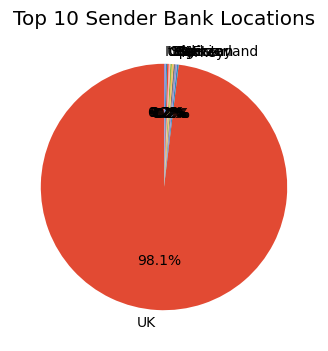

In [29]:
# Create a pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(top_sbank['count'], labels=top_sbank['Sender_bank_location'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Top 10 Sender Bank Locations")

# Show the plot
plt.show()

#doesn't show small values

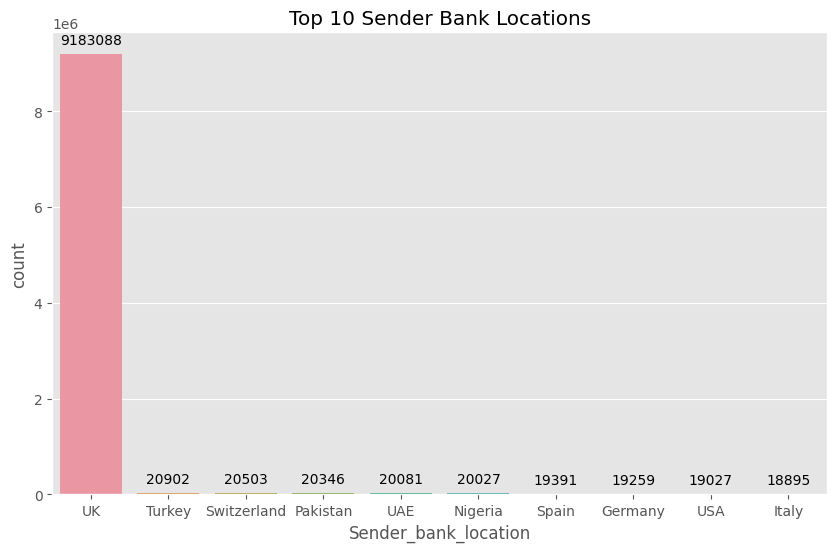

In [30]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Sender_bank_location', y='count', data=top_sbank)

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Top 10 Sender Bank Locations")

# Show the plot
plt.show()


In [31]:
rbank_location_count =  df.Receiver_bank_location.value_counts().reset_index()
rbank_location_count['Count Percentage'] = 100*rbank_location_count.loc[:,'count']/df.shape[0]
top_rbank = rbank_location_count.head(10) #shows the top 10 sender bank locations
top_rbank

,Receiver_bank_location,count,Count Percentage
0,UK,8864634,93.264303
1,Pakistan,38980,0.410106
2,Austria,38844,0.408675
3,Albania,38783,0.408034
4,Japan,38729,0.407466
5,Morocco,38704,0.407203
6,Germany,38540,0.405477
7,France,38512,0.405183
8,Mexico,38385,0.403846
9,Nigeria,38272,0.402658


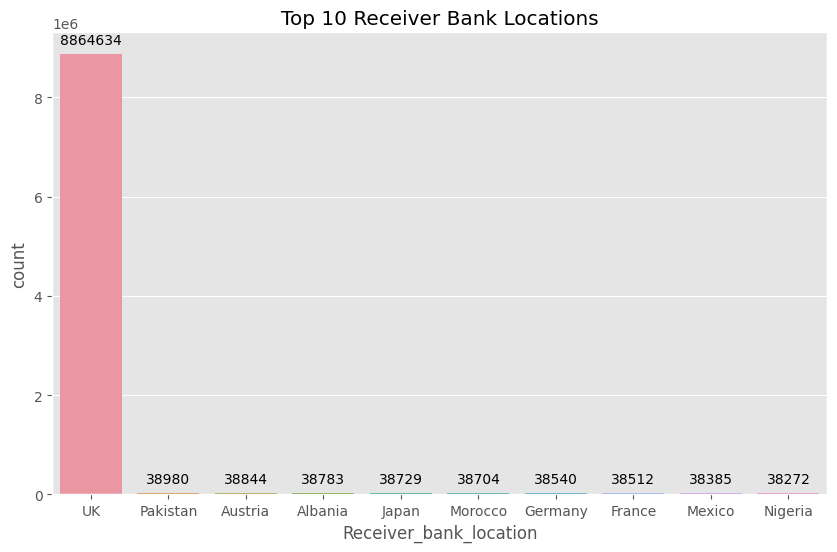

In [32]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Receiver_bank_location', y='count', data=top_rbank)

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Top 10 Receiver Bank Locations")

# Show the plot
plt.show()

#doesn't show small values

In [33]:
pay_type_count =  df.Payment_type.value_counts().reset_index().set_index('Payment_type')
pay_type_count.head(10)


,count
Payment_type,
Credit card,2012909
Debit card,2012103
Cheque,2011419
ACH,2008807
Cross-border,928043
Cash Withdrawal,300477
Cash Deposit,225206
Cross-border Withdrawal,5888


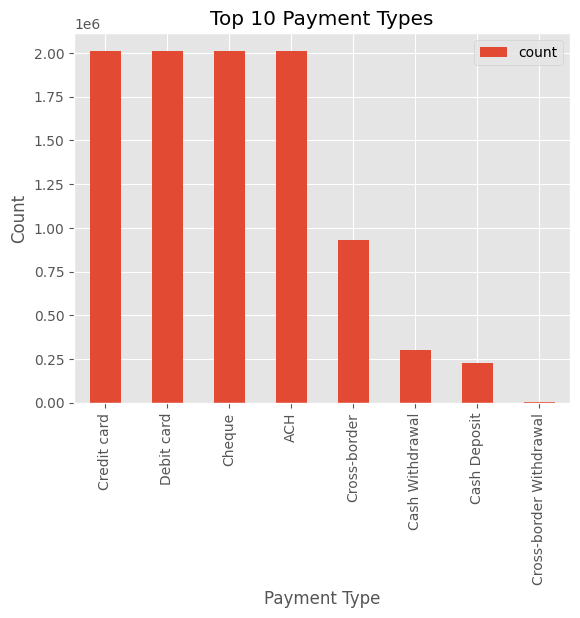

In [34]:
ax = pay_type_count.head(10)\
                    .plot(kind = 'bar', title = 'Top 10 Payment Types')

ax.set_xlabel('Payment Type')
ax.set_ylabel('Count')

plt.show()

<Figure size 200x200 with 0 Axes>

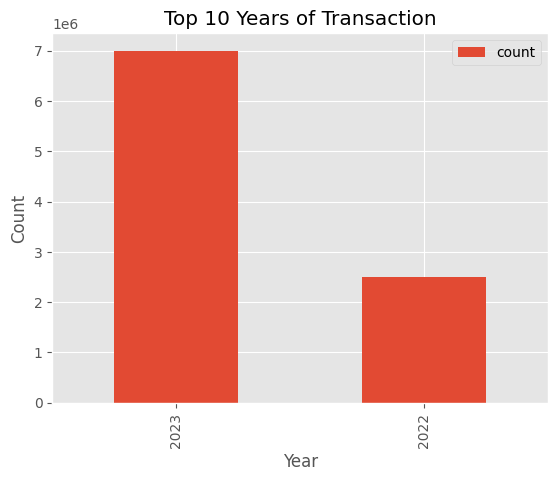

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
date_counts = df['Date'].dt.year.value_counts().reset_index().set_index('Date')
date_counts.head(10) #the dataset has data only for the years 2022-2023

plt.figure(figsize=(2,2))

ax = date_counts.head(10) \
                    .plot(kind = 'bar', title = 'Top 10 Years of Transaction')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

plt.show()

In [36]:
date_counts = df['Date'].value_counts().reset_index()
date_counts.head(10) #top 10 days of transactions

,Date,count
0,2023-02-09,36645
1,2023-02-01,35910
2,2023-02-06,35038
3,2023-02-22,34566
4,2022-12-23,34156
5,2023-04-03,33953
6,2023-02-20,33899
7,2023-02-15,33865
8,2023-02-24,33715
9,2023-05-08,33646


In [37]:
common_month_2023 = df.query('Date.dt.year == 2023')['Date'].dt.month.value_counts().reset_index()
top_month_2023 = common_month_2023.head(10) 
    
top_month_2023

,Date,count
0,5,917601
1,3,908562
2,1,908320
3,2,904806
4,4,902883
5,7,902239
6,6,897243
7,8,656582


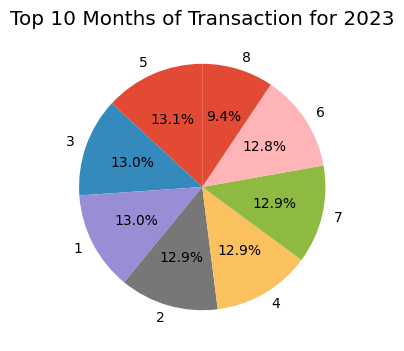

In [38]:

# Create a pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(top_month_2023['count'], labels=top_month_2023['Date'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Top 10 Months of Transaction for 2023")

# Show the plot
plt.show()

# may had the most transactions in 2023 
# with 0 transactions in the last 3 months

In [39]:
common_month_2022 = df.query('Date.dt.year == 2022')['Date'].dt.month.value_counts().reset_index()
common_month_2022.head(10) 

,Date,count
0,12,900341
1,11,897621
2,10,708654


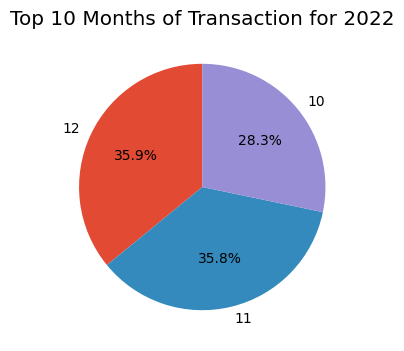

In [40]:
# Create a pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(common_month_2022.head(10)['count'], labels=common_month_2022.head(10)['Date'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Top 10 Months of Transaction for 2022")

# Show the plot
plt.show()

# only the last 3 months had transactions in 2022

In [41]:
df.query('Receiver_account == 8600542721') #transactions of the no.1 receiver
#further queries show that all the senders come from the UK and none of them are money laundering

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
4810,1900-01-01 13:36:08,2022-10-07,9794412271,8600542721,9203.38,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
17847,1900-01-01 21:57:35,2022-10-07,8493083192,8600542721,1937.86,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Group
18411,1900-01-01 22:20:43,2022-10-07,3387344903,8600542721,5253.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Group
27651,1900-01-01 10:20:31,2022-10-08,9298694119,8600542721,2986.27,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Group
34639,1900-01-01 14:36:50,2022-10-08,871893290,8600542721,338.37,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Group
...,...,...,...,...,...,...,...,...,...,...,...,...
9473578,1900-01-01 09:39:06,2023-08-22,8383569116,8600542721,7609.24,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
9474401,1900-01-01 10:09:47,2023-08-22,829224585,8600542721,3940.45,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
9474776,1900-01-01 10:23:55,2023-08-22,9794412271,8600542721,9134.19,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Group
9490292,1900-01-01 20:06:43,2023-08-22,7755976030,8600542721,12820.95,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Group


In [42]:
df.loc[df.duplicated(subset=['Sender_account','Receiver_account','Date'])] \
    .reset_index(drop=True).copy()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,1900-01-01 10:40:10,2022-10-07,6904668523,9408376441,8096.81,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
1,1900-01-01 10:45:46,2022-10-07,2797271466,4525312913,12678.00,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
2,1900-01-01 10:45:58,2022-10-07,6116657264,656192169,4742.15,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out
3,1900-01-01 10:46:13,2022-10-07,8410434333,8518184956,10786.55,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_In
4,1900-01-01 10:46:33,2022-10-07,8854146908,9600420220,5059.03,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
...,...,...,...,...,...,...,...,...,...,...,...,...
4377088,1900-01-01 10:56:52,2023-08-23,1886868543,7859647997,7978.76,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
4377089,1900-01-01 10:56:54,2023-08-23,878829325,5119883991,6038.31,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4377090,1900-01-01 10:56:56,2023-08-23,1800353787,5112488398,5281.87,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
4377091,1900-01-01 10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [43]:
df.query('Receiver_account == 9408376441').query('Sender_account == 6904668523') 

#all transactions between these 2 accounts

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
89,1900-01-01 10:38:31,2022-10-07,6904668523,9408376441,7883.30,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
130,1900-01-01 10:40:10,2022-10-07,6904668523,9408376441,8096.81,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
6209,1900-01-01 14:27:45,2022-10-07,6904668523,9408376441,8079.60,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
7209,1900-01-01 15:05:46,2022-10-07,6904668523,9408376441,7839.67,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
10221,1900-01-01 17:03:02,2022-10-07,6904668523,9408376441,7990.39,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
14042,1900-01-01 19:27:34,2022-10-07,6904668523,9408376441,7918.80,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
15366,1900-01-01 20:17:52,2022-10-07,6904668523,9408376441,8034.23,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
16284,1900-01-01 20:54:18,2022-10-07,6904668523,9408376441,7955.50,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out


In [44]:
sum = df.query('Receiver_account == 9408376441').query('Sender_account == 6904668523') \
['Amount'].sum() # total amount sent from bank 9408376441 to bank 6904668523 in UK pounds
print("The total amount sent from bank 9408376441 to bank 6904668523 =  £" + str(sum))

The total amount sent from bank 9408376441 to bank 6904668523 =  £63798.3


## Step 4: Feature Relationships
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

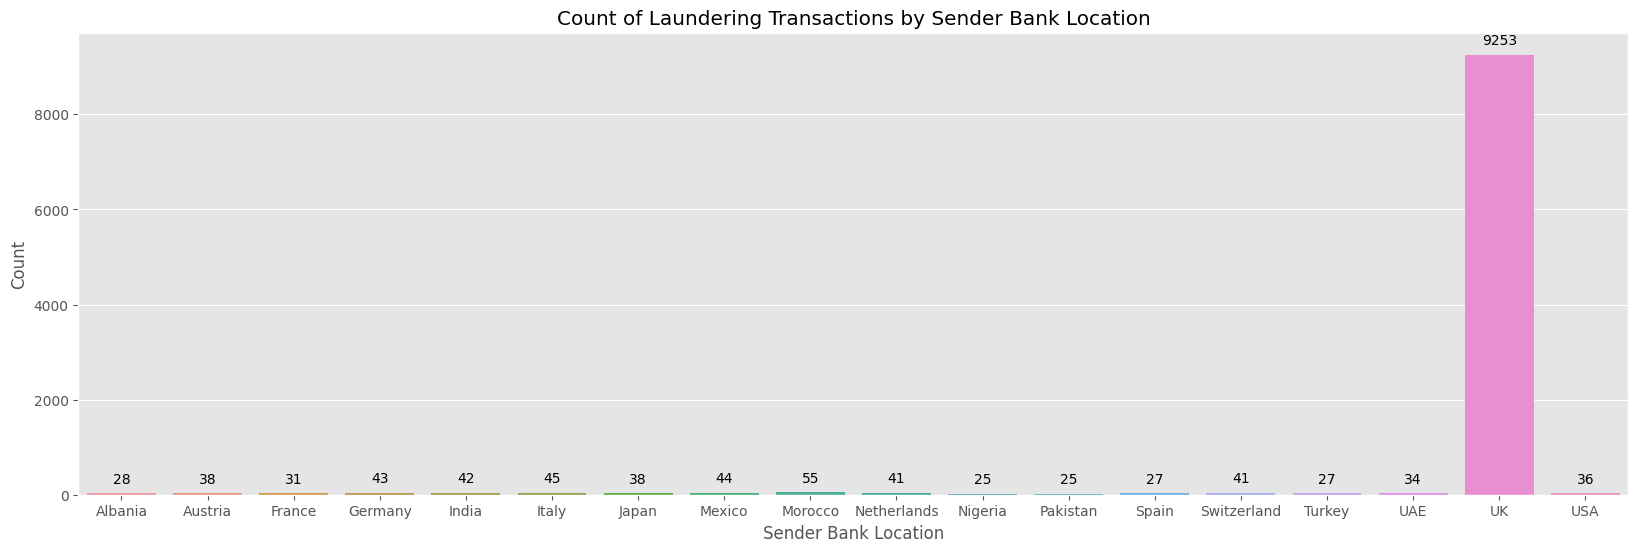

In [53]:
ax = df.query('Is_laundering == 1').groupby('Sender_bank_location').size().reset_index(name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Sender_bank_location', y='Count', data=ax)
ax.set_xlabel("Sender Bank Location")

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Count of Laundering Transactions by Sender Bank Location")

plt.show()

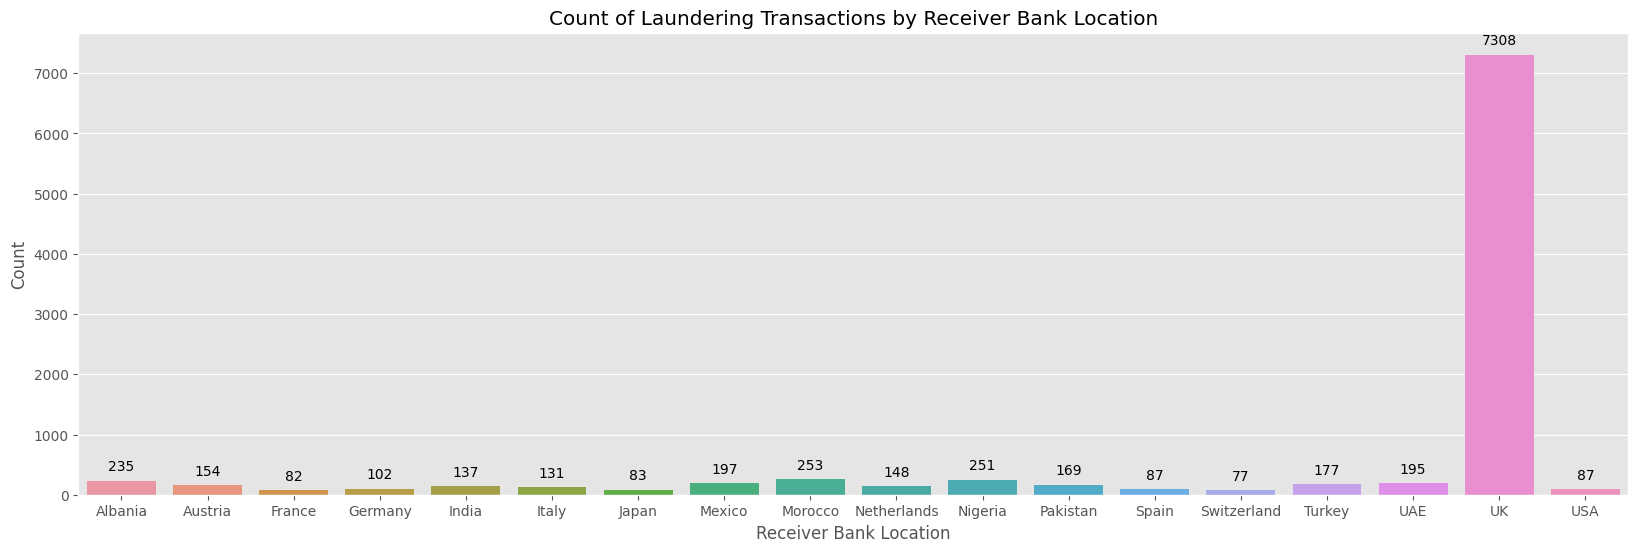

In [54]:
ax = df.query('Is_laundering == 1').groupby('Receiver_bank_location').size().reset_index(name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Receiver_bank_location', y='Count', data=ax)
ax.set_xlabel("Receiver Bank Location")

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Count of Laundering Transactions by Receiver Bank Location")

plt.show()

In [62]:
launders = df.query('Is_laundering == 1')\
.groupby(['Sender_account','Receiver_account','Sender_bank_location','Receiver_bank_location'])\
.size().reset_index(name='Trans Count')\
.sort_values(by='Trans Count', ascending=False)

launders.head(10) #top 10 launders


,Sender_account,Receiver_account,Sender_bank_location,Receiver_bank_location,Trans Count
3147,4159678387,270405806,UK,UK,37
7524,9710838491,93722998,UK,Mexico,31
3421,4503049074,2817594182,UK,UK,30
7247,9330449479,1407059664,UK,UK,29
7211,9285172899,6957298137,UK,UK,28
2981,3990750333,5988790750,UK,UK,28
7572,9772022469,4783094991,UK,UK,26
4033,5262095561,927895922,UK,UK,26
1851,2488893433,57359957,UK,UK,26
5509,7147448786,5557620276,UK,UK,26


In [64]:
total_amount = []
for i in range(launders.shape[0]):
    sum = 0
    sender = launders.iloc[i,0]
    receiver = launders.iloc[i,1]
    sum += df.loc[(df['Is_laundering']==1) & (df['Sender_account']== sender) &\
       (df['Receiver_account'] == receiver)]['Amount'].sum()
    total_amount.append(sum)



In [65]:
#to improve: take into account the currencies when summing the total amount 
launders['Total Amount'] = total_amount
launders.head(10).sort_values(by='Total Amount', ascending=False) #is there a relationship b/w the trans count and the total amount?

,Sender_account,Receiver_account,Sender_bank_location,Receiver_bank_location,Trans Count,Total Amount
3421,4503049074,2817594182,UK,UK,30,88519.45
1851,2488893433,57359957,UK,UK,26,79715.38
4033,5262095561,927895922,UK,UK,26,77341.79
7572,9772022469,4783094991,UK,UK,26,72628.71
3147,4159678387,270405806,UK,UK,37,6384.89
7211,9285172899,6957298137,UK,UK,28,5273.10
7524,9710838491,93722998,UK,Mexico,31,5013.39
7247,9330449479,1407059664,UK,UK,29,4707.47
2981,3990750333,5988790750,UK,UK,28,3586.78
5509,7147448786,5557620276,UK,UK,26,3499.16


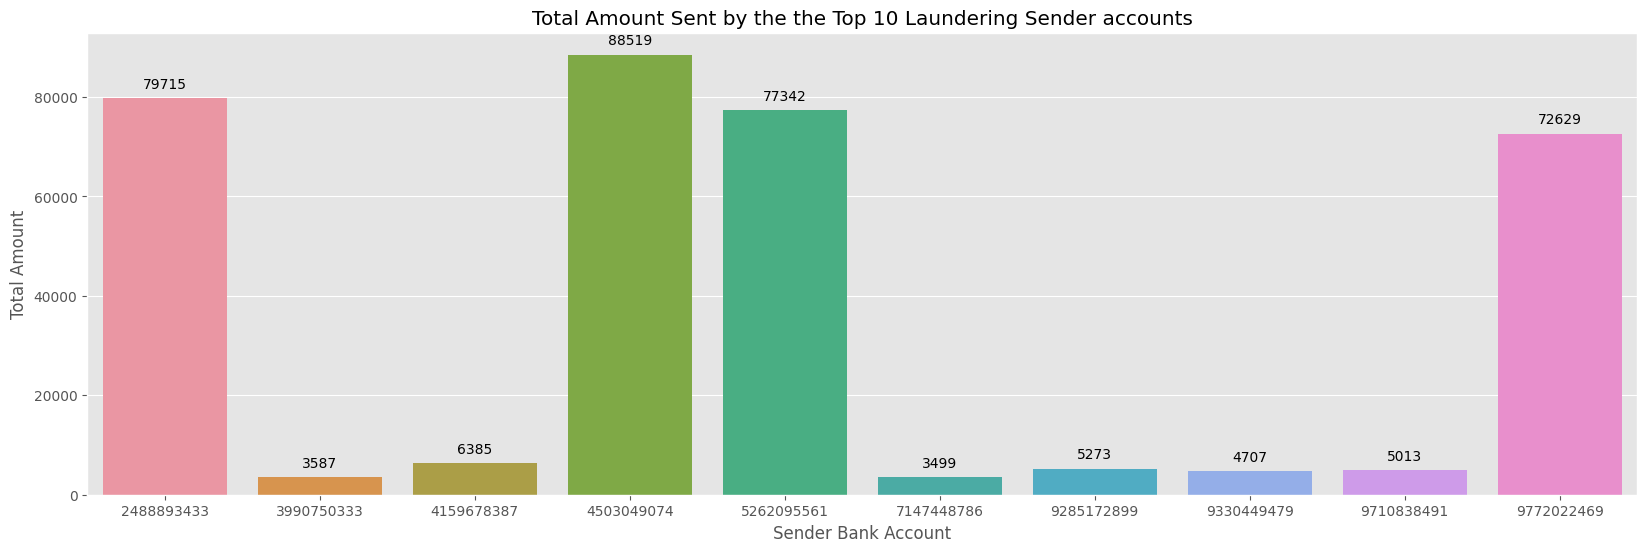

In [68]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
ax = launders.head(10) 
ax = sns.barplot(x='Sender_account', y='Total Amount', data=ax)
ax.set_xlabel("Sender Bank Account")
ax.set_ylabel("Total Amount")

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Total Amount Sent by the the Top 10 Laundering Sender accounts")

plt.show()

#NOTE: The total amount represents the total amount sent by bank x to bank y
#where x and y are amongst the top 10 laundering accounts
#it does not represent the total amount sent by bank x to all accounts 
#nor the amount received by bank y in total

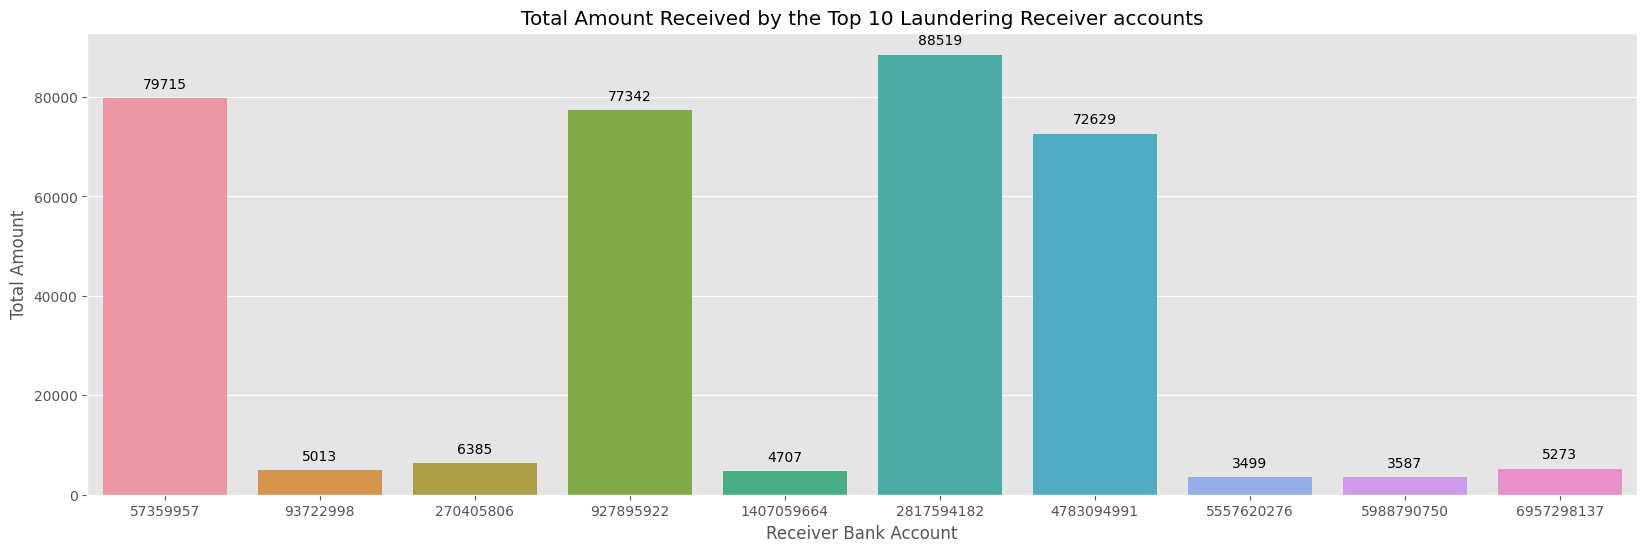

In [67]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
ax = launders.head(10) 
ax = sns.barplot(x='Receiver_account', y='Total Amount', data=ax)
ax.set_xlabel("Receiver Bank Account")
ax.set_ylabel("Total Amount")

# Add exact numbers to the bar plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the title
plt.title("Total Amount Received by the Top 10 Laundering Receiver accounts")

plt.show()

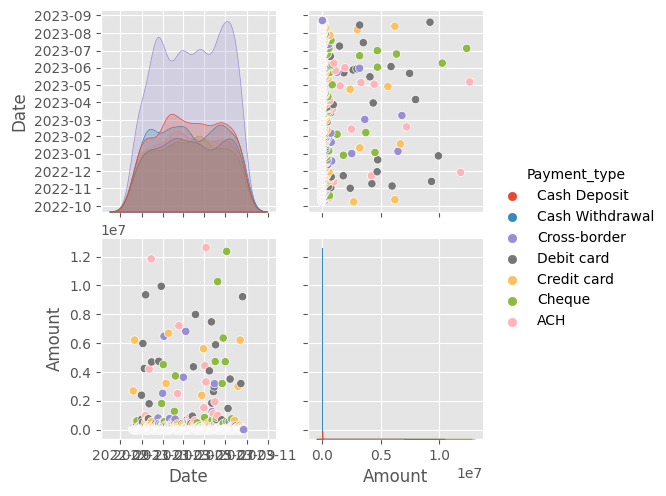

In [70]:
ax = df.query('Is_laundering == 1')
sns.pairplot(ax,
             vars=['Date','Amount'],
            hue='Payment_type')
plt.show()

In [73]:
laundered_corr = ax[['Date','Amount']].dropna().corr()
laundered_corr

,Date,Amount
Date,1.000000,-0.001737
Amount,-0.001737,1.000000


<Axes: >

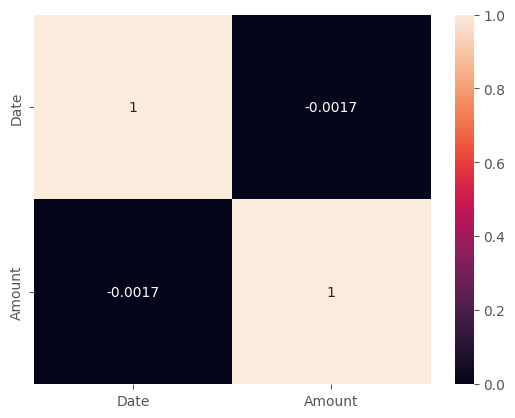

In [74]:
sns.heatmap(laundered_corr, annot=True)